In [608]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as datetime


In [637]:
users = pd.read_csv('takehome_users1.csv')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


The 'last_session_creation_time' seems to be in a bad format, but I think that might be seconds from the last creation. So I will keep it in to see if there is a correlation 

In [638]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


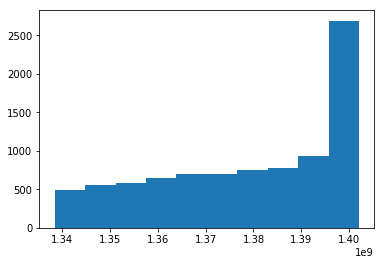

In [639]:
_ = plt.hist(users['last_session_creation_time'].dropna())

In [647]:
#Because of the non-normality of the signins, I willa replace with the median.
#Turns out the median was NaN, so I just chose mean instead
users['last_session_creation_time'].fillna(np.mean(users['last_session_creation_time']), inplace = True)

In [641]:
users['user_id'] = users['object_id']

In [642]:
users.drop(['object_id'], axis = 1, inplace = True)

In [643]:
users.creation_time = pd.to_datetime(users.creation_time)

In [646]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
user_id                       12000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


The missing values from the 'invited_by_user_id' column are because they simply were not invited. I do not think there is a need to fill these with anything for now.

In [648]:
engagements = pd.read_csv('takehome_user_engagement1.csv')
engagements.head()

,time_stamp,user_id,visited
0,4/22/2014 3:53,1,1
1,11/15/2013 3:45,2,1
2,11/29/2013 3:45,2,1
3,12/9/2013 3:45,2,1
4,12/25/2013 3:45,2,1


In [649]:
engagements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [650]:
engagements['time_stamp'] = pd.to_datetime(engagements['time_stamp'])
engagements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [651]:
merged = pd.merge(engagements, users, how = 'left', on = ['user_id'])

In [652]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
time_stamp                    207917 non-null datetime64[ns]
user_id                       207917 non-null int64
visited                       207917 non-null int64
creation_time                 207917 non-null datetime64[ns]
name                          207917 non-null object
email                         207917 non-null object
creation_source               207917 non-null object
last_session_creation_time    207917 non-null float64
opted_in_to_mailing_list      207917 non-null int64
enabled_for_marketing_drip    207917 non-null int64
org_id                        207917 non-null int64
invited_by_user_id            116887 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(5), object(3)
memory usage: 20.6+ MB


In [653]:
merged.head(25)

,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:00,1,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:00,2,1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:00,2,1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:00,2,1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:00,2,1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
5,2013-12-31 03:45:00,2,1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
6,2014-01-08 03:45:00,2,1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
7,2014-02-03 03:45:00,2,1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
8,2014-02-08 03:45:00,2,1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
9,2014-02-09 03:45:00,2,1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [654]:
visited = merged[['visited','user_id']].groupby('user_id').count()
visited.head(10) #Not everyone has a login 

,visited
user_id,
1,1
2,14
3,1
4,1
5,1
6,1
7,1
10,284
11,1


In [655]:
merged_visits = pd.merge(merged,visited, how = 'left', on = 'user_id')


In [656]:
qualified = merged_visits.loc[merged_visits['visited_y'] >= 3] #These are the only users that have more than 3 logins, which makes them qualified users

In [657]:
len(qualified['user_id'].unique()) #There are 2248 of the 12000 users that have 2 or more logins

2248

In [658]:
qualified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201002 entries, 1 to 207909
Data columns (total 13 columns):
time_stamp                    201002 non-null datetime64[ns]
user_id                       201002 non-null int64
visited_x                     201002 non-null int64
creation_time                 201002 non-null datetime64[ns]
name                          201002 non-null object
email                         201002 non-null object
creation_source               201002 non-null object
last_session_creation_time    201002 non-null float64
opted_in_to_mailing_list      201002 non-null int64
enabled_for_marketing_drip    201002 non-null int64
org_id                        201002 non-null int64
invited_by_user_id            113198 non-null float64
visited_y                     201002 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(6), object(3)
memory usage: 21.5+ MB


In [659]:
list = []
for i in zip(qualified['time_stamp'],qualified['user_id']):
    list.append(i)

In [660]:
week =  datetime.timedelta(days = 7)

In [661]:
list2 = [list[x+2] for x in np.arange(len(list)-2)] #making a list with the values as two ahead
len(list2)

201000

In [662]:
#What this does is add the user to a dictionary if two occurences of the same user 2 indeces apart (so 3 logins) within a week,
#and adds a 1 to it
dict = {}
for day1, day2 in zip(list, list2):
    if day1[1] == day2[1] and day2[0] - day1[0] <= week:
        dict[day1[1]] = 1
        

In [663]:
len(dict) #There are 1656 users who come out to those who have 3 logins within a week

1656

In [664]:
user_id = [x for x in dict.keys()]
adopted = [x for x in dict.values()]
together = [[x,y] for x,y in zip(user_id,adopted)]


In [665]:
df = pd.DataFrame(together, columns=['user_id','adopted'])
df.head()

,user_id,adopted
0,2,1
1,10,1
2,20,1
3,33,1
4,42,1


In [666]:
with_adopted = pd.merge(users, df, how = 'outer', on = 'user_id')
with_adopted['adopted'].fillna(0,inplace = True)

In [667]:
with_adopted['adopted'] = with_adopted['adopted'].astype(int)
with_adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
user_id                       12000 non-null int64
adopted                       12000 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(3)
memory usage: 1.1+ MB


In [668]:
with_adopted.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,0
1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1
2,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,0
3,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4,0
4,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5,0
5,2013-12-17 03:37:00,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,6,0
6,2012-12-16 13:24:00,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,7,0
7,2013-07-31 05:34:00,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1.379279e+09,1,1,74,NaN,8,0
8,2013-11-05 04:04:00,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1.379279e+09,0,0,302,NaN,9,0
9,2013-01-16 22:08:00,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,10,1


In [669]:
with_visits = pd.merge(with_adopted, visited, how = 'left', on = 'user_id')

In [670]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


In [671]:
target = with_adopted['adopted']
features = with_visits.drop(['user_id','org_id','adopted','creation_time','name','email','invited_by_user_id'], axis = 1)

In [672]:
dummies = pd.get_dummies(features, columns = ['creation_source'], dtype = int)


In [673]:
dummies.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,visited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.398139e+09,1,0,1.0,1,0,0,0,0
1,1.396238e+09,0,0,14.0,0,1,0,0,0
2,1.363735e+09,0,0,1.0,0,1,0,0,0
3,1.369210e+09,0,0,1.0,1,0,0,0,0
4,1.358850e+09,0,0,1.0,1,0,0,0,0


In [674]:
dummies.drop(['creation_source_SIGNUP'],axis =1,inplace = True)

In [675]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
last_session_creation_time            12000 non-null float64
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
visited                               8823 non-null float64
creation_source_GUEST_INVITE          12000 non-null int32
creation_source_ORG_INVITE            12000 non-null int32
creation_source_PERSONAL_PROJECTS     12000 non-null int32
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null int32
dtypes: float64(2), int32(4), int64(2)
memory usage: 656.2 KB


In [676]:
dummies['visited'].fillna(0, inplace = True)

In [677]:
dummies['visited'] = dummies['visited'].astype(int)
dummies['last_session_creation_time'] = dummies['last_session_creation_time'].astype(int)

In [678]:
X_train, X_test, y_train, y_test = train_test_split(dummies, target, test_size = 0.3)

In [679]:
model = LogisticRegression()
grid = {'C':[0.01,0.1,1,10,100]}
clf = GridSearchCV(model, grid, cv = 5)

In [680]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [681]:
clf.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [682]:
model_best = LogisticRegression(C = 0.01)
model_best.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [683]:
pred_y = model_best.predict(X_test)

In [684]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, pred_y).ravel()


In [685]:
precision = tp/(tp+fp)
precision

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  """Entry point for launching an IPython kernel.


nan

In [686]:
recall = tp/(tp+fn)
recall

0.0

In [687]:
tn, fp, fn, tp

(3087, 0, 513, 0)

In [688]:
model_best.score(X_test,y_test) #I get 86% of the guesses correct using this algorithm. 

0.8575

As you can see, the accuracy is not bad, but this is a perfect example for why accuracy is not the only metric you should base your classifiers on. **The model only predicted negatives!** This is caused by the fact that there are only 1656 in the positive class, while there are over 10,000 in the negative, leading to an imbalanced proportions.

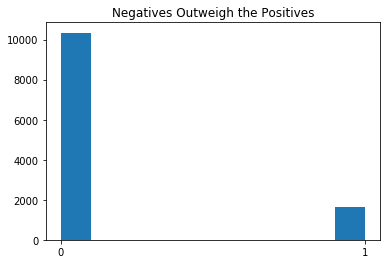

In [689]:
_ = plt.hist(with_adopted['adopted'])
_ = plt.xticks([0,1])
_ = plt.title('Negatives Outweigh the Positives')

In [690]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_best, dummies, target, cv = 5)
cv_scores.mean()

0.8620000251302127

In [691]:
coef_dict = {}
for coef, feat in zip((model_best.coef_)[0], (dummies.columns)):
    coef_dict[feat] = coef
coef_dict

{'last_session_creation_time': -1.3302597347457289e-09,
 'opted_in_to_mailing_list': -2.3470940536887234e-19,
 'enabled_for_marketing_drip': -1.4894724903853793e-19,
 'visited': 1.819225055210701e-16,
 'creation_source_GUEST_INVITE': -7.493734715347996e-20,
 'creation_source_ORG_INVITE': -4.146332103058958e-19,
 'creation_source_PERSONAL_PROJECTS': -2.9158047042528996e-19,
 'creation_source_SIGNUP_GOOGLE_AUTH': -4.859590207544962e-20}

In [692]:
import operator
sorted_dict = sorted(coef_dict.items(), key=operator.itemgetter(1))
sorted_dict

[('last_session_creation_time', -1.3302597347457289e-09),
 ('creation_source_ORG_INVITE', -4.146332103058958e-19),
 ('creation_source_PERSONAL_PROJECTS', -2.9158047042528996e-19),
 ('opted_in_to_mailing_list', -2.3470940536887234e-19),
 ('enabled_for_marketing_drip', -1.4894724903853793e-19),
 ('creation_source_GUEST_INVITE', -7.493734715347996e-20),
 ('creation_source_SIGNUP_GOOGLE_AUTH', -4.859590207544962e-20),
 ('visited', 1.819225055210701e-16)]

The strongest negative coefficients, which mean they are good predictors for a 0, are when it is created via PERONAL PROJECTS, ORGANIZATION INVITES, or SIGNUPS. The few coefficients that are positive are incredibly close to 0, meaning they are not a good predictor either way, which is why I yielded 0 positive predictions. Surprisingly also, organizations 0 and 1 have pretty low coefficients, which means they are pretty good indicators that people from that organization will not be eventual adopted users. 

Trying XGBClassifier

In [693]:
xgb = GradientBoostingClassifier()
xgb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [694]:
pred_xgb = xgb.predict(X_test)

In [695]:
xgb.score(X_test,y_test)

0.9836111111111111

In [696]:
matrix_xgb = confusion_matrix(y_test, pred_xgb)
tn, fp, fn, tp = matrix_xgb.ravel()
tn, fp, fn, tp

(3059, 28, 31, 482)

In [697]:
precision_xgb = tp/(tp+fp)
precision_xgb

0.9450980392156862

In [698]:
recall_xgb = tp/(tp+fn)
recall_xgb

0.9395711500974658

In [699]:
xgb.feature_importances_

array([4.90968122e-01, 2.49806673e-04, 2.85498049e-04, 4.70954857e-01,
       1.58877095e-02, 1.72383586e-03, 3.80084318e-03, 1.61293279e-02])

In [700]:
feat_names = dummies.columns.values.tolist()
feat_names

['last_session_creation_time',
 'opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'visited',
 'creation_source_GUEST_INVITE',
 'creation_source_ORG_INVITE',
 'creation_source_PERSONAL_PROJECTS',
 'creation_source_SIGNUP_GOOGLE_AUTH']

In [701]:
coef_dict = {}
for coef, feat in zip(xgb.feature_importances_, (dummies.columns)):
    coef_dict[feat] = coef
coef_dict

{'last_session_creation_time': 0.49096812209764656,
 'opted_in_to_mailing_list': 0.0002498066726280217,
 'enabled_for_marketing_drip': 0.0002854980486456895,
 'visited': 0.47095485677390114,
 'creation_source_GUEST_INVITE': 0.01588770948677134,
 'creation_source_ORG_INVITE': 0.0017238358551969408,
 'creation_source_PERSONAL_PROJECTS': 0.0038008431808633724,
 'creation_source_SIGNUP_GOOGLE_AUTH': 0.016129327884346904}

In [702]:
import operator
sorted_dict = sorted(coef_dict.items(), key=operator.itemgetter(1))
sorted_dict

[('opted_in_to_mailing_list', 0.0002498066726280217),
 ('enabled_for_marketing_drip', 0.0002854980486456895),
 ('creation_source_ORG_INVITE', 0.0017238358551969408),
 ('creation_source_PERSONAL_PROJECTS', 0.0038008431808633724),
 ('creation_source_GUEST_INVITE', 0.01588770948677134),
 ('creation_source_SIGNUP_GOOGLE_AUTH', 0.016129327884346904),
 ('visited', 0.47095485677390114),
 ('last_session_creation_time', 0.49096812209764656)]

THE XGBClassifier worked much better and actually predicted positive outcomes. The feature that most correlated with a positive outcome was the last session creation time and how many times a user visited or logged in to the website. 